In [90]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
Batsman_Data = pd.read_csv('Batsman_Data.csv')
Ground_Data = pd.read_csv('Ground_Averages.csv')
ODI_Scores_Data = pd.read_csv('ODI_Match_Totals.csv')
ODI_Results_Data = pd.read_csv('ODI_Match_Results.csv')
WC_Players_Data = pd.read_csv('WC_players.csv')
Bowler_Data = pd.read_csv('Bowler_data.csv')

In [92]:
Ground_Data.sample(6)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
84,"Holkar Cricket Stadium, Indore - India",2015-2017,2,2,0,0,1059,30,1149,35.30,5.53
17,"Seddon Park, Hamilton - New Zealand",2013-2019,16,15,0,1,7748,215,8165,36.03,5.69
89,"Kensington Oval, Bridgetown, Barbados - West I...",2016-2019,7,6,0,1,3271,99,3461,33.04,5.67
50,"Old Trafford, Manchester - England",2013-2018,6,6,0,0,2294,87,2627,26.36,5.23
61,"Newlands, Cape Town - South Africa",2013-2019,7,7,0,0,3526,106,3847,33.26,5.49
67,"Bert Sutcliffe Oval, Lincoln - New Zealand",2014-2014,2,2,0,0,1060,26,1114,40.76,5.70


In [93]:
ODI_Results_Data.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [94]:
ODI_Scores_Data.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [95]:
ODI_Scores_Data["Scores_ID"] = ODI_Scores_Data["Unnamed: 0"]
ODI_Scores_Data.drop(columns="Unnamed: 0",inplace=True)

In [96]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [97]:
#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = ODI_Scores_Data.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))
            

In [98]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Cardiff': 'Sophia Gardens, Cardiff',
 'Manchester': 'Old Trafford, Manchester',
 'Bristol': 'County Ground, Bristol',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Leeds': 'Headingley, Leeds',
 'The Oval': 'The Oval, London',
 'Southampton': 'Rose Bowl, Southampton',
 "Lord's": "Lord's, London",
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street'}

In [99]:
#Let's gather the data of all ODI's in these WC Venues
WC_Grounds_History = ODI_Scores_Data[ODI_Scores_Data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()


,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
74,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,557
75,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
76,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,558
77,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,845
78,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,559


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'SriLanka'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Pakistan'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

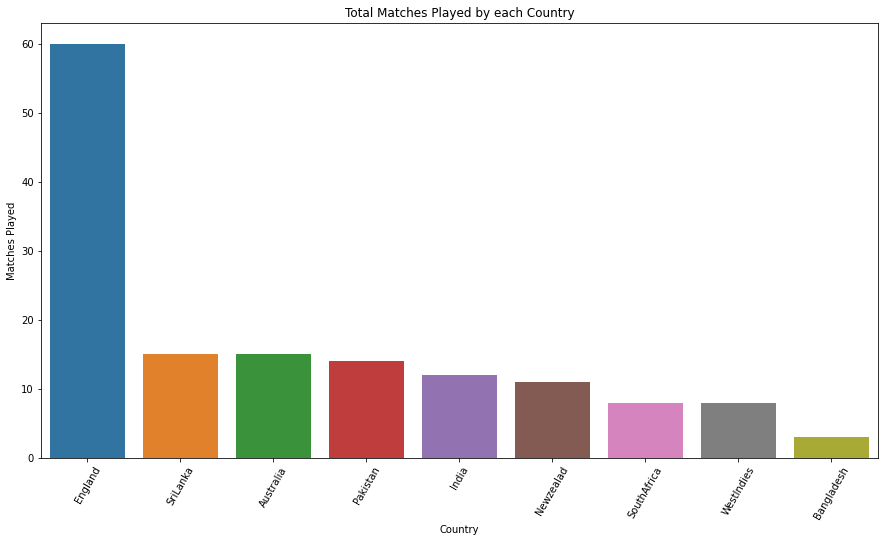

In [100]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

In [101]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
298,73/0,12.1,6.00,68.0,2,won,v Sri Lanka,"Old Trafford, Manchester",28 May 2014,ODI # 3494,England,1,868
919,236,49.2,4.78,NaN,1,lost,v Pakistan,"Sophia Gardens, Cardiff",12 Jun 2017,ODI # 3888,SriLanka,8,233
341,227,50.0,4.54,NaN,1,lost,v India,"Trent Bridge, Nottingham",30 Aug 2014,ODI # 3520,England,1,872
299,300/9,50.0,6.00,NaN,1,won,v England,"Lord's, London",31 May 2014,ODI # 3495,SriLanka,8,159
967,258/5,35.1,7.33,253.0,2,won,v West Indies,"The Oval, London",27 Sep 2017,ODI # 3916,England,1,944


In [102]:
WC_Grounds_History.Result.value_counts()

won     67
lost    65
n/r      8
tied     4
-        2
Name: Result, dtype: int64

In [103]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     67
lost    65
n/r      8
tied     4
Name: Result, dtype: int64

In [104]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()


,Country,Result,Count
0,Australia,lost,60.000000
1,Australia,n/r,6.666667
2,Australia,won,33.333333
3,Bangladesh,lost,33.333333
4,Bangladesh,n/r,33.333333


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'England'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Newzealad'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'WestIndies')])

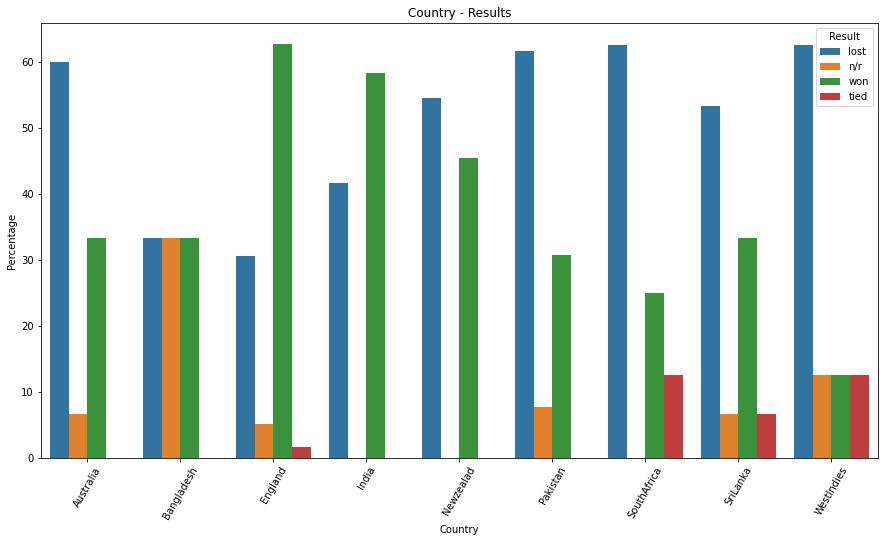

In [105]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

Text(0.5, 0, 'England')

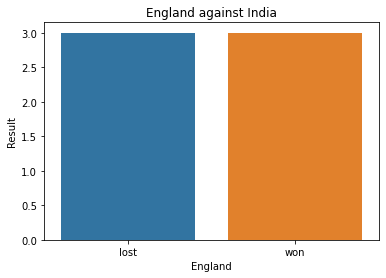

In [106]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

In [107]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
348,253,48.4,5.19,295.0,2,lost,v England,"Headingley, Leeds",5 Sep 2014,ODI # 3525,India,6,729
340,228/4,43.0,5.30,228.0,2,won,v England,"Trent Bridge, Nottingham",30 Aug 2014,ODI # 3520,India,6,727
738,275,42.4,6.44,445.0,2,lost,v England,"Trent Bridge, Nottingham",30 Aug 2016,ODI # 3773,Pakistan,7,494
81,331/7,50.0,6.62,NaN,1,won,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,India,6,687
100,159/8,24.0,6.62,170.0,2,lost,v England,"Sophia Gardens, Cardiff",16 Jun 2013,ODI # 3373,Newzealad,5,562


Text(0, 0.5, 'Winning Percentage')

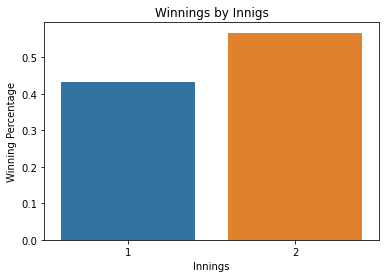

In [108]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

In [109]:
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Headingley, Leeds",1,40.000000
3,"Headingley, Leeds",2,60.000000
4,"Lord's, London",1,57.142857


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Headingley, Leeds'),
  Text(2, 0, "Lord's, London"),
  Text(3, 0, 'Old Trafford, Manchester'),
  Text(4, 0, 'Riverside Ground, Chester-le-Street'),
  Text(5, 0, 'Rose Bowl, Southampton'),
  Text(6, 0, 'Sophia Gardens, Cardiff'),
  Text(7, 0, 'The Oval, London'),
  Text(8, 0, 'Trent Bridge, Nottingham')])

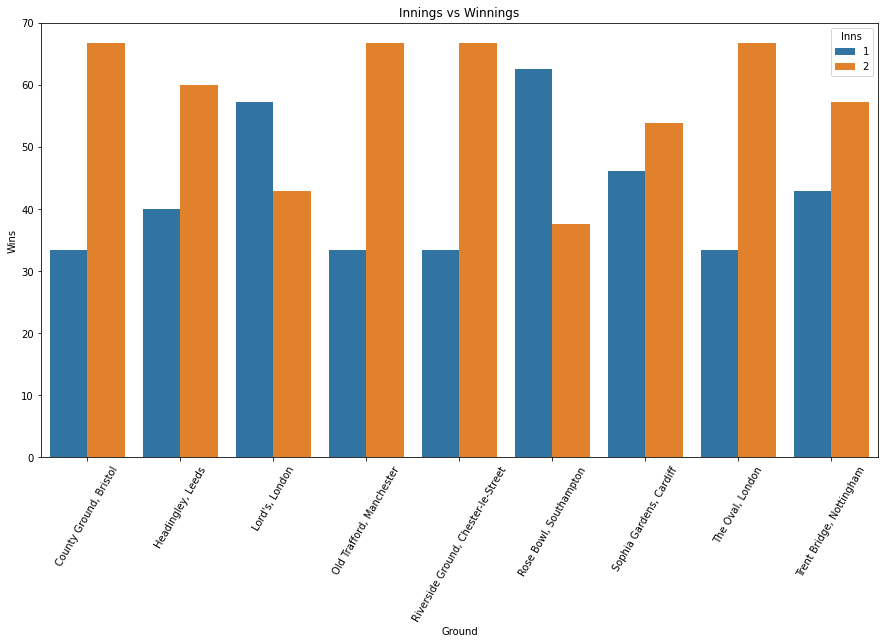

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

In [111]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]

Text(0, 0.5, 'Scores')

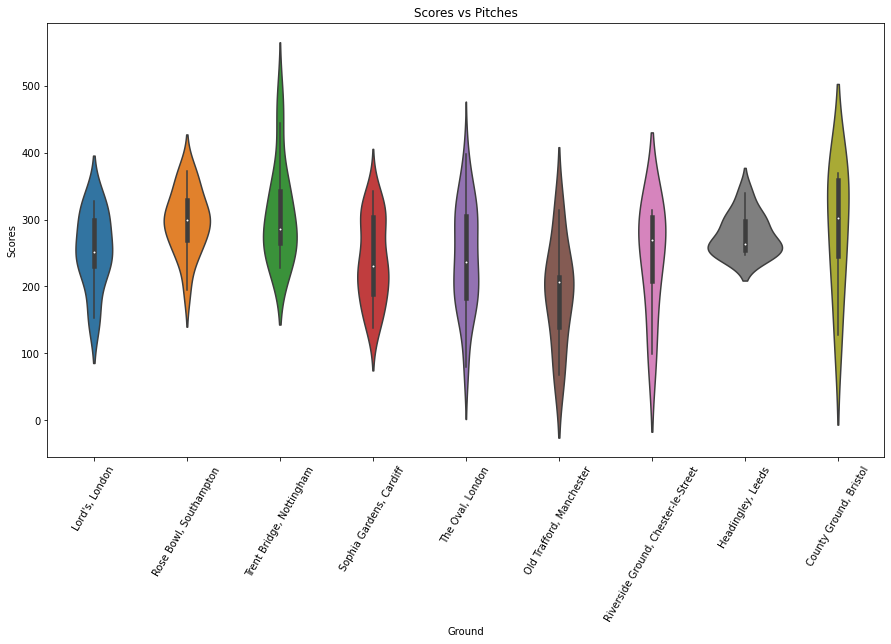

In [112]:
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(15,8))
#sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.xticks(rotation = 60)
sns.violinplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

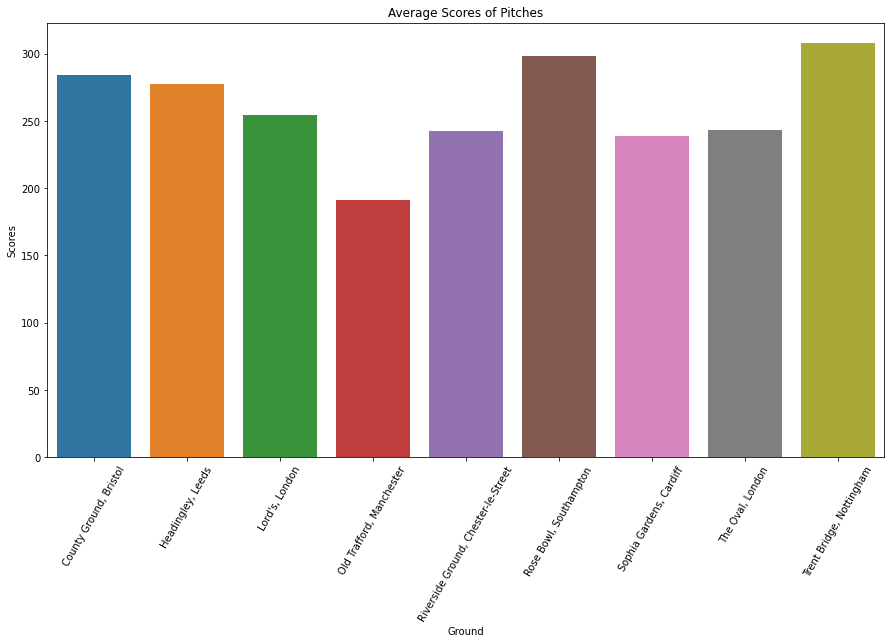

In [113]:
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

In [114]:
def no_of_wickets(value):
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Headingley, Leeds'),
  Text(2, 0, "Lord's, London"),
  Text(3, 0, 'Old Trafford, Manchester'),
  Text(4, 0, 'Riverside Ground, Chester-le-Street'),
  Text(5, 0, 'Rose Bowl, Southampton'),
  Text(6, 0, 'Sophia Gardens, Cardiff'),
  Text(7, 0, 'The Oval, London'),
  Text(8, 0, 'Trent Bridge, Nottingham')])

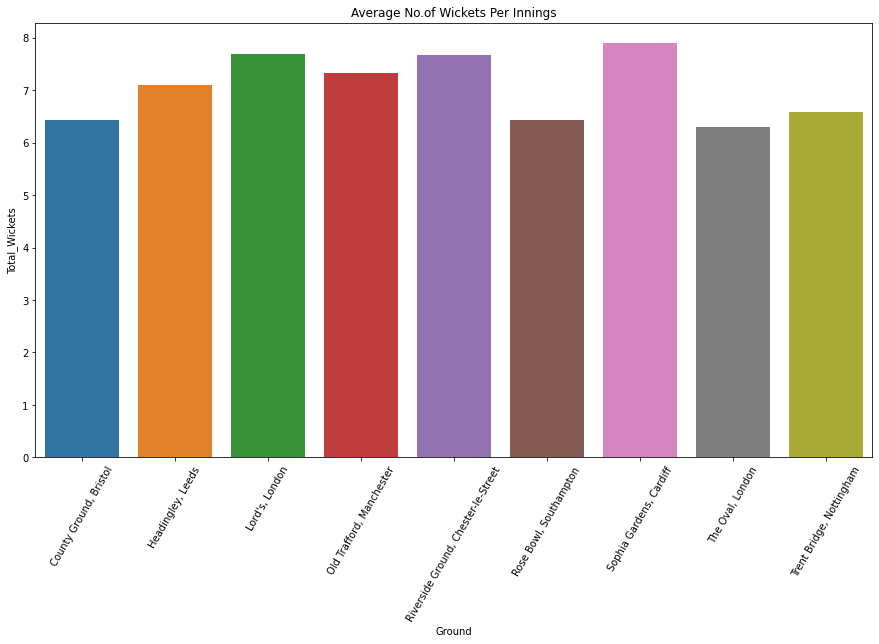

In [115]:
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)

Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Total_Wickets", data = Stadium_Wickets).set_title("Average No.of Wickets Per Innings")
plt.xticks(rotation = 60)

In [116]:
Grounds = WC_Grounds_History.Ground.unique()
WC_Teams = WC_Grounds_History.Country.unique()
Ground_Winnings = {}
for Ground in Grounds:
    Ground_Winnings.update({Ground : {}})
    for Team in WC_Teams:
        Country_Ground_Record = WC_Grounds_History[(WC_Grounds_History.Country == Team) & \
                                                   (WC_Grounds_History.Ground == Ground)]
        #print("Ground : ", Ground, "Team : ", Team)
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record.Result == "won"])
        winning_percentage = matches_won / matches_played * 100
        Ground_Winnings[Ground].update({Team : {"matches_played" : matches_played,\
                                       "matches_won": matches_won,\
                                       "winning_percentage" : winning_percentage}})
Ground_Winnings["Lord's, London"]


{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

In [117]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_Winnings.items():
    
    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [118]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Old Trafford, Manchester'),
  Text(6, 0, 'Riverside Ground, Chester-le-Street'),
  Text(7, 0, 'Headingley, Leeds'),
  Text(8, 0, 'County Ground, Bristol')])

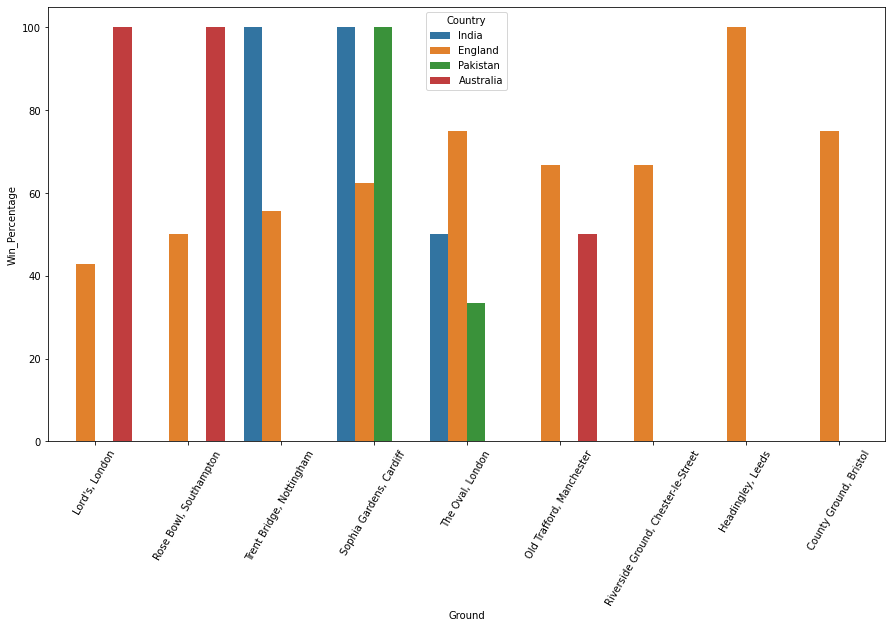

In [119]:
Pitch_Team_Winnings
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"])
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Old Trafford, Manchester'),
  Text(6, 0, 'Riverside Ground, Chester-le-Street'),
  Text(7, 0, 'Headingley, Leeds'),
  Text(8, 0, 'County Ground, Bristol')])

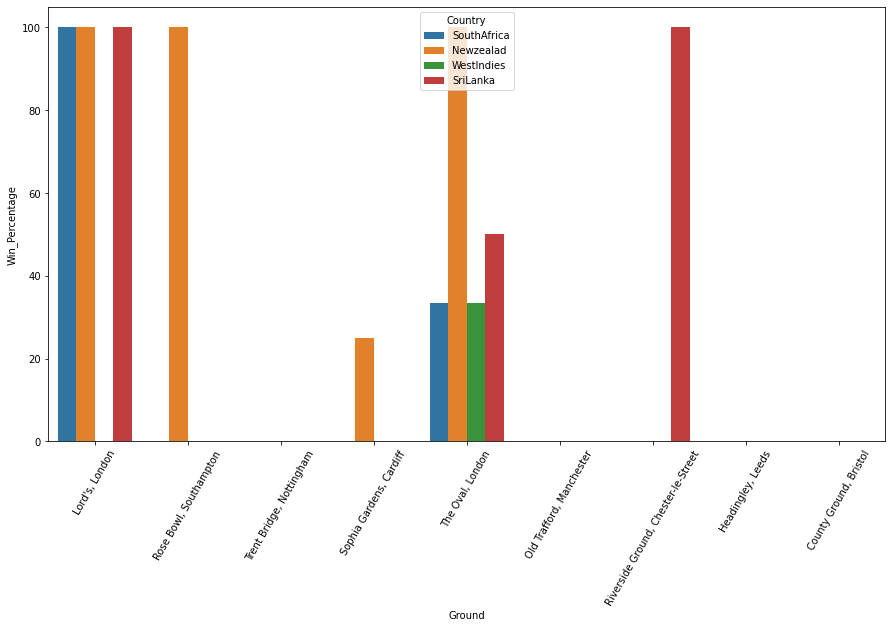

In [120]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["SouthAfrica","Newzealad","WestIndies","SriLanka"])
plt.xticks(rotation = 60)

In [121]:
Batsman_Data.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
9374,9375,11*,11,4,275.00,2,0,v Zimbabwe,Dhaka,6 Dec 2010,ODI # 3075,Mashrafe Mortaza,56007
84,85,DNB,-,-,-,-,-,v Bangladesh,Dhaka,11 Dec 2018,ODI # 4072,Oshane Thomas,914567
1526,1527,7,7,7,100.00,1,0,v West Indies,Bulawayo,23 Nov 2016,ODI # 3808,Kusal Perera,300631
9159,9160,9*,9,7,128.57,2,0,v Zimbabwe,Dhaka,3 Dec 2010,ODI # 3073,Shakib Al Hasan,56143
8620,8621,4,4,16,25.00,0,0,v India,Dubai (DSC),28 Sep 2018,ODI # 4048,Mahmudullah,56025


In [122]:
#Removing DNB, and Fetching the Details of Batsmen stats only in England
Batsman_Data.drop(columns=Batsman_Data.columns[0],inplace=True)
Batsman_Data = Batsman_Data[~Batsman_Data.Bat1.isin(["DNB","TDNB"])]
Batsman_Data = Batsman_Data[Batsman_Data.Player_ID.isin(WC_Players_Data.ID)]
stadiums = [item[0] for item in set(WC_Ground_Stats)]
Batsman_Data_in_England = Batsman_Data[Batsman_Data.Ground.isin(stadiums)]


In [123]:
#Calculating Averages
def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)

In [124]:
change_type = ["Runs","BF","4s","6s"]
for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()

In [125]:
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut

In [126]:
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
0,Bristol,Adil Rashid,9,3,2,0,244497,0,inf
332,Southampton,Dinesh Karthik,44,45,4,0,30045,0,inf
370,The Oval,Bhuvneshwar Kumar,1,8,0,0,326016,0,inf


In [127]:
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
47,Junaid Khan,0,9,0,0,519102,1,0.000000
36,JP Duminy,249,341,21,2,629048,11,22.636364
75,Nathan Coulter-Nile,7,6,1,0,522708,0,inf
16,Darren Bravo,55,107,5,0,1109888,3,18.333333
89,Shaun Marsh,372,374,28,11,53464,8,46.500000


In [128]:
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]\
.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
34,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
24,Evin Lewis,200,152,18,9,1295703,2,100.000000
38,Jason Holder,152,121,10,7,1174455,2,76.000000
85,Sarfaraz Ahmed,450,486,36,1,2049840,6,75.000000
61,Mahmudullah,144,165,8,3,280125,2,72.000000
64,Martin Guptill,596,617,66,11,2491412,9,66.222222
45,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
90,Shikhar Dhawan,686,721,87,6,338820,11,62.363636
80,Ravindra Jadeja,248,233,27,3,2112075,4,62.000000
27,Fakhar Zaman,421,371,44,11,3585337,7,60.142857


In [129]:
Player_WC_ID = Batsman_Data[["Player_ID","Batsman"]].drop_duplicates()

In [130]:
#Best Batsman with Average above 40
Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
WC_Players_Data.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
34,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
24,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
38,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
85,Sarfaraz Ahmed,450,486,36,1,227760,6,75.000000,Pakistan
61,Mahmudullah,144,165,8,3,56025,2,72.000000,Bangladesh
64,Martin Guptill,596,617,66,11,226492,9,66.222222,NewZealand
45,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
90,Shikhar Dhawan,686,721,87,6,28235,11,62.363636,India
80,Ravindra Jadeja,248,233,27,3,234675,4,62.000000,India
27,Fakhar Zaman,421,371,44,11,512191,7,60.142857,Pakistan


In [131]:
Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
34,Imam-ul-Haq,234,263,24,1,568276,2,117.0,Pakistan,88.973384
24,Evin Lewis,200,152,18,9,431901,2,100.0,WestIndies,131.578947
38,Jason Holder,152,121,10,7,391485,2,76.0,WestIndies,125.619835
85,Sarfaraz Ahmed,450,486,36,1,227760,6,75.0,Pakistan,92.592593
61,Mahmudullah,144,165,8,3,56025,2,72.0,Bangladesh,87.272727


In [132]:
Best_Batsman_Average.sort_values(["Strike_Rate"],ascending = False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
24,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
38,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
46,Jos Buttler,1463,1198,130,41,308967,27,54.185185,England,122.120200
27,Fakhar Zaman,421,371,44,11,512191,7,60.142857,Pakistan,113.477089
33,Imad Wasim,224,199,22,5,227758,4,56.000000,Pakistan,112.562814


In [133]:
Best_Batsman_Average["Average_4s_per_wicket"] = Best_Batsman_Average["4s"]/Best_Batsman_Average["Out_or_NotOut"]
Best_Batsman_Average["Average_6s_per_wicket"] = Best_Batsman_Average["6s"]/Best_Batsman_Average["Out_or_NotOut"]

In [134]:
Best_Batsman_Average.sort_values(by = ["Average_4s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
34,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384,12.000000,0.500000
24,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.000000,4.500000
90,Shikhar Dhawan,686,721,87,6,28235,11,62.363636,India,95.145631,7.909091,0.545455
45,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England,111.119691,7.545455,1.045455
64,Martin Guptill,596,617,66,11,226492,9,66.222222,NewZealand,96.596434,7.333333,1.222222


In [135]:
Best_Batsman_Average.sort_values(by = ["Average_6s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
24,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.000000,4.500000
38,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835,5.000000,3.500000
27,Fakhar Zaman,421,371,44,11,512191,7,60.142857,Pakistan,113.477089,6.285714,1.571429
46,Jos Buttler,1463,1198,130,41,308967,27,54.185185,England,122.120200,4.814815,1.518519
61,Mahmudullah,144,165,8,3,56025,2,72.000000,Bangladesh,87.272727,4.000000,1.500000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pakistan'),
  Text(1, 0, 'WestIndies'),
  Text(2, 0, 'Bangladesh'),
  Text(3, 0, 'NewZealand'),
  Text(4, 0, 'England'),
  Text(5, 0, 'India'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'SriLanka')])

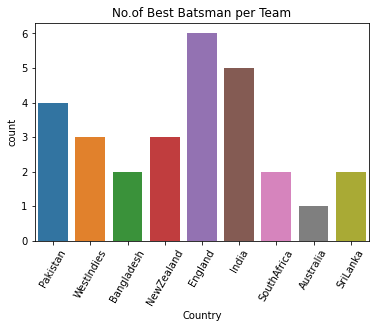

In [136]:
sns.countplot(Best_Batsman_Average["Country"]).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

In [137]:
Best_Batsman_Average[["Country","Batsman"]].sort_values("Country")

,Country,Batsman
89,Australia,Shaun Marsh
61,Bangladesh,Mahmudullah
94,Bangladesh,Tamim Iqbal
46,England,Jos Buttler
39,England,Jason Roy
23,England,Eoin Morgan
45,England,Jonny Bairstow
44,England,Joe Root
9,England,Ben Stokes
99,India,Virat Kohli


In [138]:
Bowler_Data.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [139]:
Bowler_Data = Bowler_Data[Bowler_Data.Ground.isin(stadiums)]
Bowler_Data = Bowler_Data[~Bowler_Data.Overs.str.contains('-')]
Bowler_Data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
7381,7382,10.0,0,36,0,3.60,-,-,v Sri Lanka,Nottingham,21 Jun 2016,ODI # 3751,Adil Rashid,244497
10262,10263,1.0,0,7,0,7.00,-,-,v England,Nottingham,19 Jun 2018,ODI # 4011,Aaron Finch,5334
10141,10142,6.0,0,33,0,5.50,-,-,v England,Manchester,13 Sep 2015,ODI # 3684,Pat Cummins,489889
1079,1080,10.0,1,54,2,5.40,27.00,30.0,v England,Lord's,3 Jul 2011,ODI # 3168,Lasith Malinga,49758
3948,3949,6.0,0,40,0,6.66,-,-,v England,Cardiff,4 Sep 2016,ODI # 3777,Shoaib Malik,42657


In [140]:
def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [141]:
Bowler_Data["Balls"] = Bowler_Data.Overs.apply(overs_to_ball)
for i in ["Runs","Mdns","Wkts","Balls"]:
    Bowler_Data[i] = Bowler_Data[i].astype("float")
Bowler_Data.Ground = Bowler_Data.Ground.apply(Full_Ground_names)
Bowlers_Data_in_England = Bowler_Data.groupby(["Bowler"]).sum()[["Runs","Mdns","Wkts","Balls"]].reset_index()

In [142]:
Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
42,Kusal Mendis,13.0,0.0,0.0,12.0,6.500000,inf,inf
24,Hasan Ali,529.0,2.0,19.0,558.0,5.688172,27.842105,29.368421
19,Faheem Ashraf,181.0,0.0,3.0,152.0,7.144737,60.333333,50.666667
55,Mohammad Hafeez,443.0,1.0,8.0,578.0,4.598616,55.375000,72.250000
56,Mohammad Hasnain,80.0,0.0,2.0,60.0,8.000000,40.000000,30.000000


In [143]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
2,Adil Rashid,2089.0,2.0,62.0,2202.0,5.692098,33.693548,35.516129
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,209.0,1.0,7.0,270.0,4.644444,29.857143,38.571429
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
7,Ben Stokes,1135.0,1.0,29.0,1117.0,6.096688,39.137931,38.517241
...,...,...,...,...,...,...,...,...
76,Tim Southee,628.0,9.0,23.0,689.0,5.468795,27.304348,29.956522
77,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286
78,Trent Boult,157.0,1.0,4.0,180.0,5.233333,39.250000,45.000000
79,Virat Kohli,109.0,0.0,1.0,96.0,6.812500,109.000000,96.000000


In [144]:
Player_WC_ID = Bowler_Data[["Player_ID","Bowler"]].drop_duplicates()

Bowlers_Data_in_England = Bowlers_Data_in_England.merge(Player_WC_ID,how = "left",on = "Bowler")

Country_Player = list(Bowlers_Data_in_England.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Bowlers_Data_in_England["Country"] = Country_Player
Bowlers_Data_in_England.iloc[57,-1] = "SriLanka"
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
0,Adil Rashid,2089.0,2.0,62.0,2202.0,5.692098,33.693548,35.516129,244497,England
1,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,SouthAfrica
2,Angelo Mathews,209.0,1.0,7.0,270.0,4.644444,29.857143,38.571429,49764,SriLanka
3,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,WestIndies
4,Ben Stokes,1135.0,1.0,29.0,1117.0,6.096688,39.137931,38.517241,311158,England
...,...,...,...,...,...,...,...,...,...,...
57,Tim Southee,628.0,9.0,23.0,689.0,5.468795,27.304348,29.956522,232364,SriLanka
58,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England
59,Trent Boult,157.0,1.0,4.0,180.0,5.233333,39.250000,45.000000,277912,NewZealand
60,Virat Kohli,109.0,0.0,1.0,96.0,6.812500,109.000000,96.000000,253802,India


In [145]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
30,Lasith Malinga,989.0,12.0,33.0,1071.0,5.540616,29.969697,32.454545,49758,SriLanka
8,Chris Woakes,1109.0,12.0,33.0,1185.0,5.615190,33.606061,35.909091,247235,England
57,Tim Southee,628.0,9.0,23.0,689.0,5.468795,27.304348,29.956522,232364,SriLanka
33,Mark Wood,1201.0,9.0,24.0,1291.0,5.581720,50.041667,53.791667,351588,England
10,David Willey,1156.0,8.0,38.0,1161.0,5.974160,30.421053,30.552632,308251,England
38,Moeen Ali,1346.0,5.0,32.0,1481.0,5.453072,42.062500,46.281250,8917,England
25,Kagiso Rabada,232.0,4.0,8.0,270.0,5.155556,29.000000,33.750000,550215,SouthAfrica
34,Mashrafe Mortaza,420.0,4.0,4.0,498.0,5.060241,105.000000,124.500000,56007,Bangladesh
28,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies
48,Ravindra Jadeja,544.0,4.0,18.0,612.0,5.333333,30.222222,34.000000,234675,India


In [146]:
Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
61,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,India,0.000000
20,Jasprit Bumrah,148.0,0.0,2.0,162.0,5.481481,74.000000,81.000000,625383,India,0.000000
22,Jhye Richardson,214.0,1.0,5.0,162.0,7.925926,42.800000,32.400000,774223,Australia,3.703704
25,Kagiso Rabada,232.0,4.0,8.0,270.0,5.155556,29.000000,33.750000,550215,SouthAfrica,8.888889
46,Nuwan Pradeep,388.0,0.0,11.0,342.0,6.807018,35.272727,31.090909,324358,SriLanka,0.000000


In [147]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
28,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
25,Kagiso Rabada,232.0,4.0,8.0,270.0,5.155556,29.000000,33.750000,550215,SouthAfrica,8.888889
24,Junaid Khan,280.0,4.0,8.0,303.0,5.544554,35.000000,37.875000,259551,Pakistan,7.920792
57,Tim Southee,628.0,9.0,23.0,689.0,5.468795,27.304348,29.956522,232364,SriLanka,7.837446
44,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308
37,Mitchell Starc,242.0,3.0,9.0,267.0,5.438202,26.888889,29.666667,311592,Australia,6.741573
30,Lasith Malinga,989.0,12.0,33.0,1071.0,5.540616,29.969697,32.454545,49758,SriLanka,6.722689
8,Chris Woakes,1109.0,12.0,33.0,1185.0,5.615190,33.606061,35.909091,247235,England,6.075949
9,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,SouthAfrica,4.945055
5,Bhuvneshwar Kumar,389.0,4.0,11.0,489.0,4.773006,35.363636,44.454545,326016,India,4.907975


In [148]:
Bowlers_Data_in_England.sort_values(by = ["Average"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
29,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
42,Mosaddek Hossain,60.0,0.0,3.0,62.0,5.806452,20.000000,20.666667,550133,Bangladesh,0.000000
47,Pat Cummins,311.0,3.0,14.0,372.0,5.016129,22.214286,26.571429,489889,Australia,4.838710
41,Mohammed Shami,124.0,0.0,5.0,150.0,4.960000,24.800000,30.000000,481896,India,0.000000
28,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
26,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
17,Imran Tahir,132.0,0.0,5.0,141.0,5.617021,26.400000,28.200000,40618,SouthAfrica,0.000000
37,Mitchell Starc,242.0,3.0,9.0,267.0,5.438202,26.888889,29.666667,311592,Australia,6.741573
6,Chris Gayle,408.0,2.0,15.0,530.0,4.618868,27.200000,35.333333,51880,WestIndies,2.264151
54,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,Australia,0.000000


In [149]:
Bowlers_Data_in_England.sort_values(by = ["Economy"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
45,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,Australia,0.000000
61,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,India,0.000000
39,Mohammad Hafeez,443.0,1.0,8.0,578.0,4.598616,55.375000,72.250000,41434,Pakistan,1.038062
6,Chris Gayle,408.0,2.0,15.0,530.0,4.618868,27.200000,35.333333,51880,WestIndies,2.264151
2,Angelo Mathews,209.0,1.0,7.0,270.0,4.644444,29.857143,38.571429,49764,SriLanka,2.222222
28,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
44,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308
5,Bhuvneshwar Kumar,389.0,4.0,11.0,489.0,4.773006,35.363636,44.454545,326016,India,4.907975
53,Shoaib Malik,295.0,2.0,7.0,360.0,4.916667,42.142857,51.428571,42657,Pakistan,3.333333
29,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000


In [150]:
Bowlers_Data_in_England.sort_values(by = ["Strike_Rate"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
29,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
42,Mosaddek Hossain,60.0,0.0,3.0,62.0,5.806452,20.000000,20.666667,550133,Bangladesh,0.000000
58,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England,3.333333
26,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
47,Pat Cummins,311.0,3.0,14.0,372.0,5.016129,22.214286,26.571429,489889,Australia,4.838710
17,Imran Tahir,132.0,0.0,5.0,141.0,5.617021,26.400000,28.200000,40618,SouthAfrica,0.000000
21,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000
31,Liam Plunkett,1898.0,3.0,66.0,1933.0,5.891361,28.757576,29.287879,19264,England,0.931195
15,Hasan Ali,529.0,2.0,19.0,558.0,5.688172,27.842105,29.368421,681305,Pakistan,2.150538
37,Mitchell Starc,242.0,3.0,9.0,267.0,5.438202,26.888889,29.666667,311592,Australia,6.741573


In [151]:
Bowlers_Data_in_England.sort_values(by = ["Wkts"],ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Liam Plunkett,1898.0,3.0,66.0,1933.0,5.891361,28.757576,29.287879,19264,England,0.931195
0,Adil Rashid,2089.0,2.0,62.0,2202.0,5.692098,33.693548,35.516129,244497,England,0.544959
10,David Willey,1156.0,8.0,38.0,1161.0,5.974160,30.421053,30.552632,308251,England,4.134367
8,Chris Woakes,1109.0,12.0,33.0,1185.0,5.615190,33.606061,35.909091,247235,England,6.075949
30,Lasith Malinga,989.0,12.0,33.0,1071.0,5.540616,29.969697,32.454545,49758,SriLanka,6.722689
38,Moeen Ali,1346.0,5.0,32.0,1481.0,5.453072,42.062500,46.281250,8917,England,2.025658
4,Ben Stokes,1135.0,1.0,29.0,1117.0,6.096688,39.137931,38.517241,311158,England,0.537153
33,Mark Wood,1201.0,9.0,24.0,1291.0,5.581720,50.041667,53.791667,351588,England,4.182804
57,Tim Southee,628.0,9.0,23.0,689.0,5.468795,27.304348,29.956522,232364,SriLanka,7.837446
15,Hasan Ali,529.0,2.0,19.0,558.0,5.688172,27.842105,29.368421,681305,Pakistan,2.150538


In [152]:
aggregations = {
    'Runs':'sum',
    'Mdns':'sum',
    'Wkts':'sum',
    'Balls':'sum',
    'Economy': 'mean',
    'Average':'mean',
    'Strike_Rate':'mean',
    'Maidens_per_Overs_Percentage':'mean'
}
Bowlers_Data_in_England_TeamWise = Bowlers_Data_in_England.groupby('Country').agg(aggregations).reset_index()
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,1795.0,10.0,55.0,1938.0,5.580182,40.808025,45.245503,2.980272
1,Bangladesh,996.0,4.0,16.0,1124.0,5.492450,70.300000,77.933333,0.963855
2,England,10774.0,41.0,299.0,11150.0,5.958625,40.720910,41.174464,2.418380
3,India,1909.0,9.0,51.0,2166.0,5.387086,57.666288,61.806818,1.356218
4,NewZealand,802.0,1.0,21.0,756.0,6.369987,38.248214,36.621429,0.833333
5,Pakistan,2450.0,10.0,58.0,2662.0,6.168926,56.796610,53.970168,1.758004
6,SouthAfrica,1386.0,10.0,37.0,1501.0,5.669118,42.364286,44.478571,3.131740
7,SriLanka,2535.0,22.0,82.0,2714.0,5.619300,37.706208,40.845567,2.797059
8,WestIndies,847.0,6.0,21.0,933.0,5.876678,83.800000,76.083333,6.816038


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'SouthAfrica'),
  Text(2, 0, 'SriLanka'),
  Text(3, 0, 'WestIndies'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

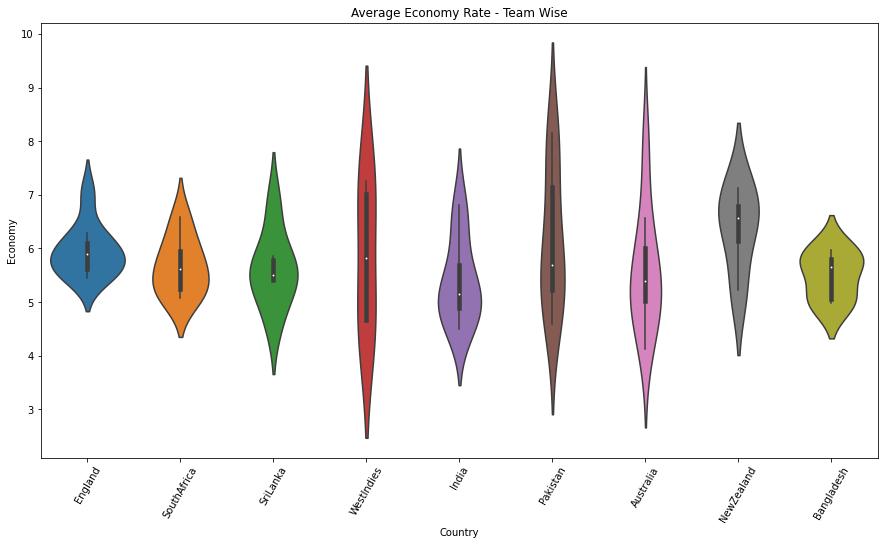

In [153]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Economy", data = Bowlers_Data_in_England).set_title("Average Economy Rate - Team Wise")
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'SouthAfrica'),
  Text(2, 0, 'SriLanka'),
  Text(3, 0, 'WestIndies'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

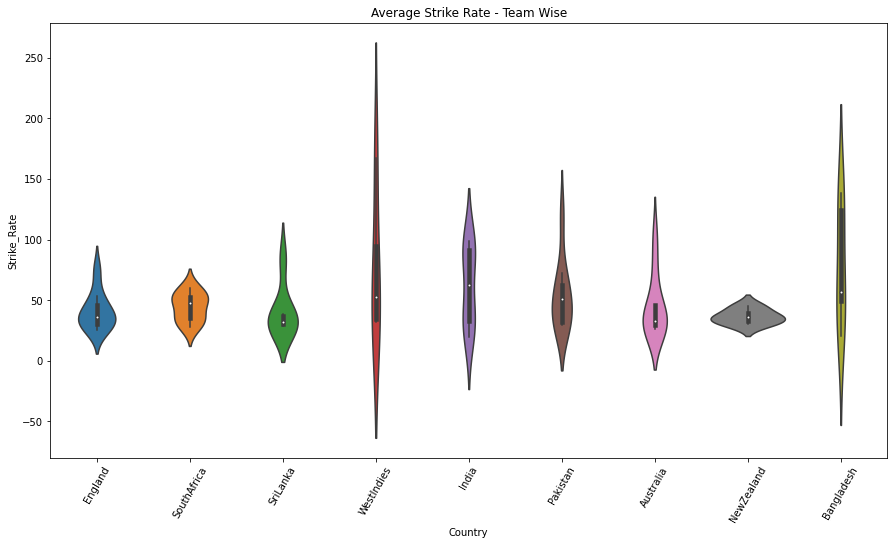

In [154]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Strike_Rate", data = Bowlers_Data_in_England).set_title("Average Strike Rate - Team Wise")
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'SouthAfrica'),
  Text(2, 0, 'SriLanka'),
  Text(3, 0, 'WestIndies'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

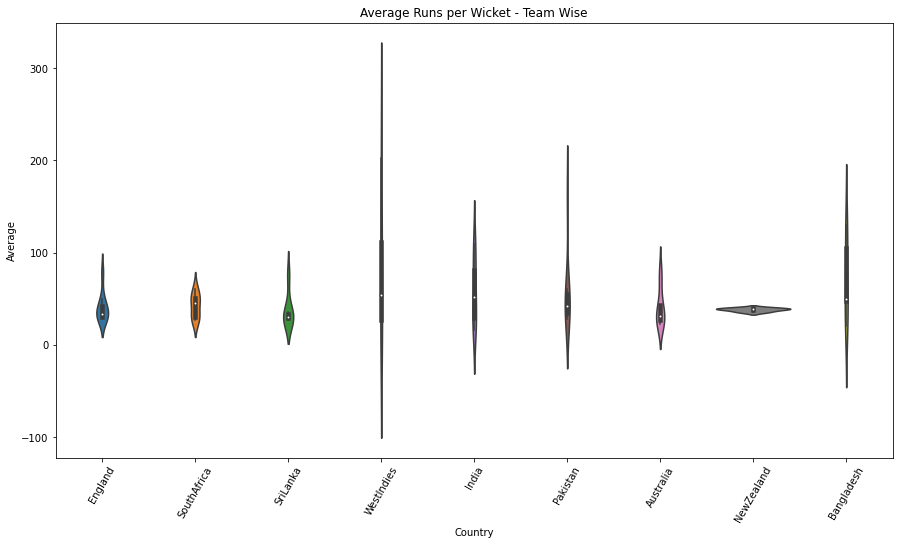

In [155]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Average", data = Bowlers_Data_in_England).set_title("Average Runs per Wicket - Team Wise")
plt.xticks(rotation = 60)

In [156]:
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,1795.0,10.0,55.0,1938.0,5.580182,40.808025,45.245503,2.980272
1,Bangladesh,996.0,4.0,16.0,1124.0,5.492450,70.300000,77.933333,0.963855
2,England,10774.0,41.0,299.0,11150.0,5.958625,40.720910,41.174464,2.418380
3,India,1909.0,9.0,51.0,2166.0,5.387086,57.666288,61.806818,1.356218
4,NewZealand,802.0,1.0,21.0,756.0,6.369987,38.248214,36.621429,0.833333
5,Pakistan,2450.0,10.0,58.0,2662.0,6.168926,56.796610,53.970168,1.758004
6,SouthAfrica,1386.0,10.0,37.0,1501.0,5.669118,42.364286,44.478571,3.131740
7,SriLanka,2535.0,22.0,82.0,2714.0,5.619300,37.706208,40.845567,2.797059
8,WestIndies,847.0,6.0,21.0,933.0,5.876678,83.800000,76.083333,6.816038


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Australia'),
  Text(0.0, 0, 'Australia'),
  Text(1.0, 0, 'Bangladesh'),
  Text(2.0, 0, 'England'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'NewZealand'),
  Text(5.0, 0, 'Pakistan'),
  Text(6.0, 0, 'SouthAfrica'),
  Text(7.0, 0, 'SriLanka'),
  Text(8.0, 0, 'WestIndies'),
  Text(9.0, 0, '')])

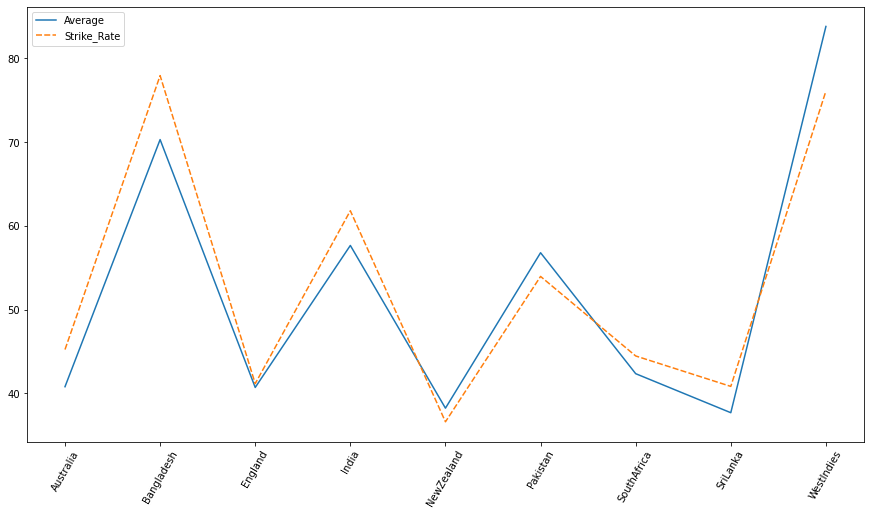

In [157]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[Bowlers_Data_in_England_TeamWise.columns[6:8]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Australia'),
  Text(0.0, 0, 'Australia'),
  Text(1.0, 0, 'Bangladesh'),
  Text(2.0, 0, 'England'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'NewZealand'),
  Text(5.0, 0, 'Pakistan'),
  Text(6.0, 0, 'SouthAfrica'),
  Text(7.0, 0, 'SriLanka'),
  Text(8.0, 0, 'WestIndies'),
  Text(9.0, 0, '')])

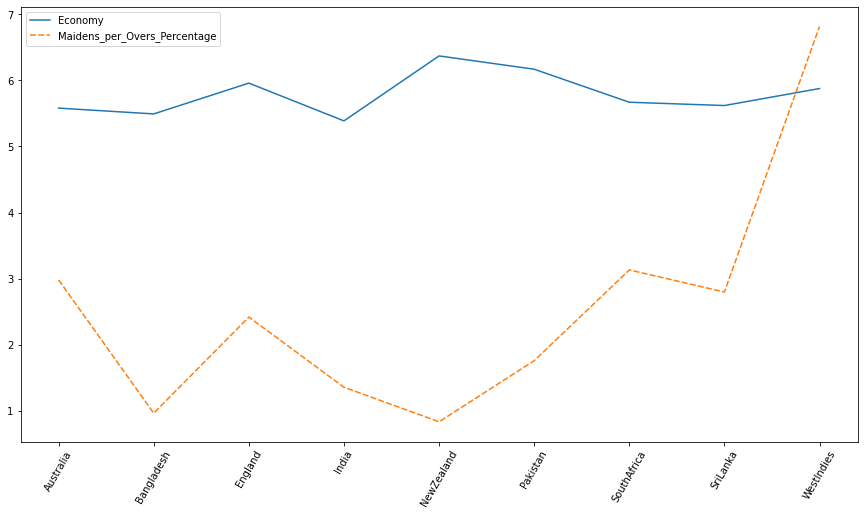

In [158]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[["Economy","Maidens_per_Overs_Percentage"]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

In [159]:
Best_Bowlers_Data = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)
                        
                       ]
Best_Bowlers_Data


,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
0,Adil Rashid,2089.0,2.0,62.0,2202.0,5.692098,33.693548,35.516129,244497,England,0.544959
2,Angelo Mathews,209.0,1.0,7.0,270.0,4.644444,29.857143,38.571429,49764,SriLanka,2.222222
4,Ben Stokes,1135.0,1.0,29.0,1117.0,6.096688,39.137931,38.517241,311158,England,0.537153
6,Chris Gayle,408.0,2.0,15.0,530.0,4.618868,27.200000,35.333333,51880,WestIndies,2.264151
8,Chris Woakes,1109.0,12.0,33.0,1185.0,5.615190,33.606061,35.909091,247235,England,6.075949
9,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,SouthAfrica,4.945055
10,David Willey,1156.0,8.0,38.0,1161.0,5.974160,30.421053,30.552632,308251,England,4.134367
15,Hasan Ali,529.0,2.0,19.0,558.0,5.688172,27.842105,29.368421,681305,Pakistan,2.150538
21,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000
24,Junaid Khan,280.0,4.0,8.0,303.0,5.544554,35.000000,37.875000,259551,Pakistan,7.920792


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'SriLanka'),
  Text(2, 0, 'WestIndies'),
  Text(3, 0, 'SouthAfrica'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'India'),
  Text(7, 0, 'NewZealand')])

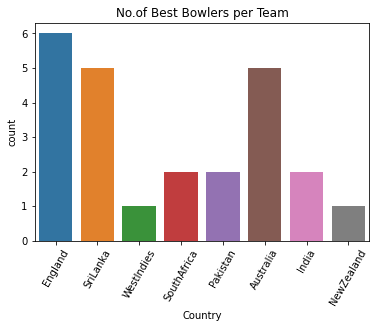

In [160]:
sns.countplot(Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)].Country).\
set_title("No.of Best Bowlers per Team")
plt.xticks(rotation = 60)

In [161]:
Bowler_Data = Bowler_Data[Bowler_Data.columns[1:]]
Bowler_Data.columns = ['Overs', 'Maidens', 'Runs_Given', 'Wickets', 'Economy', 'Bowling_Average', 'Bowling_StrikeRate', 'Opposition',\
                       'Ground', 'Start_Date', 'Match_ID', 'Player', 'Player_ID', 'Balls_Bowled']
Bowler_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled
4551,4.0,0.0,30.0,0.0,7.50,-,-,v Bangladesh,"Sophia Gardens, Cardiff",9 Jun 2017,ODI # 3883,James Neesham,355269,24.0
7608,10.0,1.0,62.0,1.0,6.20,62.00,60.0,v West Indies,"Rose Bowl, Southampton",29 Sep 2017,ODI # 3918,Tom Curran,550235,60.0
2232,10.0,0.0,67.0,1.0,6.70,67.00,60.0,v England,"Headingley, Leeds",22 Aug 2008,ODI # 2748,Dale Steyn,47492,60.0
5636,7.0,0.0,49.0,2.0,7.00,24.50,21.0,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,Bhuvneshwar Kumar,326016,42.0
5572,7.0,0.0,47.0,0.0,6.71,-,-,v England,"Trent Bridge, Nottingham",12 Jul 2018,ODI # 4014,Hardik Pandya,625371,42.0


In [162]:
Batsman_Data_Information.sample(5)
Batsman_Data_Information.Ground = Batsman_Data_Information.Ground.apply(Full_Ground_names)
Batsman_Data_Information = Batsman_Data_Information[["Runs","BF","SR","4s","6s","Match_ID",\
                                                     "Player_ID","Out_or_NotOut"]]
Batsman_Data_Information.columns = ["Runs_Scored","Balls_Faced","Batting_StrikeRate","4s","6s",\
                                    "Match_ID","Player_ID","Out_or_NotOut"]
                                    
Batsman_Data_Information.sample(5)

,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Match_ID,Player_ID,Out_or_NotOut
1907,13,15,86.66,2,0,ODI # 3758,49764,1
9280,1,3,33.33,0,0,ODI # 2255,56007,1
9756,21,20,105.00,2,0,ODI # 3286,267192,1
7201,20,33,60.60,3,0,ODI # 3865,298438,1
4459,14,18,77.77,0,0,ODI # 3883,502714,0


In [163]:
All_Rounders_Data = Bowler_Data.merge(Batsman_Data_Information,on = ["Match_ID","Player_ID"])
# All_Rounders_Data[["Player","Player_ID","Match_ID","Start_Date","Ground","Opposition","Runs_Scored","Balls_Faced",\
#                   "Batting_StrikeRate","4s","6s","Out_or_NotOut","Overs","Maidens","Runs_Given","Wickets","Economy",\
#                   "Bowling_Average","Bowling_StrikeRate"]]
All_Rounders_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Out_or_NotOut
59,1.0,0.0,3.0,0.0,3.00,-,-,v Pakistan,"Sophia Gardens, Cardiff",12 Jun 2017,ODI # 3888,Dhananjaya de Silva,465793,6.0,1,6,16.66,0,0,1
54,2.0,0.0,9.0,1.0,4.50,9.00,12.0,v England,"Riverside Ground, Chester-le-Street",25 May 2014,ODI # 3493,Angelo Mathews,49764,12.0,30,35,85.71,2,0,1
219,6.0,3.0,13.0,1.0,2.16,13.00,36.0,v Australia,"Old Trafford, Manchester",13 Sep 2015,ODI # 3684,David Willey,308251,36.0,0,2,0.00,0,0,1
31,9.0,0.0,60.0,1.0,6.66,60.00,54.0,v Australia,"The Oval, London",17 Jun 2013,ODI # 3374,Lasith Malinga,49758,54.0,2,1,200.00,0,0,0
172,7.0,0.0,28.0,4.0,4.00,7.00,10.5,v England,"Sophia Gardens, Cardiff",27 Aug 2014,ODI # 3517,Ravindra Jadeja,234675,42.0,9,11,81.81,0,0,0


In [164]:
All_Rounders_Data = All_Rounders_Data.groupby(["Player_ID","Player"]).sum().reset_index()
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut
45,324358,Nuwan Pradeep,0.0,173.0,6.0,168.0,13,23,2,0,3
12,49758,Lasith Malinga,8.0,592.0,17.0,641.0,70,76,6,2,8
73,774223,Jhye Richardson,1.0,214.0,5.0,162.0,21,34,0,0,2
70,629074,Kusal Mendis,0.0,13.0,0.0,12.0,22,34,2,0,1
32,272262,Kane Richardson,1.0,156.0,6.0,156.0,15,27,0,1,2


In [165]:
#Bowling Stats
All_Rounders_Data["Economy"] = All_Rounders_Data.Runs_Given*6/All_Rounders_Data.Balls_Bowled
All_Rounders_Data["Bowling_StrikeRate"] = All_Rounders_Data.Runs_Given/All_Rounders_Data.Wickets
All_Rounders_Data["Bowling_Average"] = All_Rounders_Data.Balls_Bowled/All_Rounders_Data.Wickets
#Batting Stats
All_Rounders_Data["Batting_Average"] = All_Rounders_Data.Runs_Scored/All_Rounders_Data.Out_or_NotOut
All_Rounders_Data["Batting_StrikeRate"] = All_Rounders_Data.Runs_Scored*100/All_Rounders_Data.Balls_Faced
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
45,324358,Nuwan Pradeep,0.0,173.0,6.0,168.0,13,23,2,0,3,6.178571,28.833333,28.000000,4.333333,56.521739
1,8917,Moeen Ali,4.0,1043.0,28.0,1115.0,542,473,47,22,17,5.612556,37.250000,39.821429,31.882353,114.587738
56,439952,Chris Morris,2.0,237.0,5.0,258.0,67,59,7,2,4,5.511628,47.400000,51.600000,16.750000,113.559322
17,56143,Shakib Al Hasan,0.0,189.0,4.0,228.0,145,162,15,1,4,4.973684,47.250000,57.000000,36.250000,89.506173
28,253802,Virat Kohli,0.0,109.0,1.0,96.0,138,125,13,1,4,6.812500,109.000000,96.000000,34.500000,110.400000


In [166]:
All_Rounders_Data[(All_Rounders_Data.Balls_Bowled > 120)&\
                 #(All_Rounders_Data.Bowling_Average < 60)&\
                 (All_Rounders_Data.Economy < 7)&\
                 #(All_Rounders_Data.Bowling_StrikeRate > 35)&\
                 (All_Rounders_Data.Batting_StrikeRate > 70)&\
                 (All_Rounders_Data.Batting_Average > 35)]

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
6,41434,Mohammad Hafeez,1.0,443.0,8.0,578.0,467,614,49,10,13,4.598616,55.375000,72.250000,35.923077,76.058632
13,49764,Angelo Mathews,1.0,181.0,7.0,234.0,423,525,32,5,8,4.641026,25.857143,33.428571,52.875000,80.571429
17,56143,Shakib Al Hasan,0.0,189.0,4.0,228.0,145,162,15,1,4,4.973684,47.250000,57.000000,36.250000,89.506173
20,227758,Imad Wasim,1.0,363.0,7.0,405.0,224,199,22,5,4,5.377778,51.857143,57.857143,56.000000,112.562814
25,234675,Ravindra Jadeja,1.0,436.0,11.0,432.0,248,233,27,3,4,6.055556,39.636364,39.272727,62.000000,106.437768
35,277906,Kane Williamson,0.0,200.0,5.0,186.0,422,421,42,3,8,6.451613,40.000000,37.200000,52.750000,100.237530
39,303669,Joe Root,0.0,619.0,8.0,588.0,1004,1166,88,3,25,6.316327,77.375000,73.500000,40.160000,86.106346
41,311158,Ben Stokes,1.0,1008.0,27.0,985.0,936,971,74,28,22,6.140102,37.333333,36.481481,42.545455,96.395469
47,325026,Glenn Maxwell,0.0,239.0,6.0,270.0,279,232,28,9,7,5.311111,39.833333,45.000000,39.857143,120.258621
53,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835
